In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


colors = ['#21918c', '#b5367a', '#d55e00', '#4b5d67', '#b58900']

In [131]:
class AnalysisCSV:

   def __init__(self, fileName, N = 10):
      
      self.dDF = pd.read_csv(fileName['Data'])
      self.rDF = pd.read_csv(fileName['Rewards'])

      self.grDF = self.rDF.groupby(self.rDF.index // N).mean()

In [142]:
manualFiles = {
   'Data': 'Data/ManualControlActions.csv',
   'Rewards': 'Data/ManualControlRewards.csv'
}

baselineFiles = {
   'Data': f'Data/BaselineControlActions.csv',
   'Rewards': f'Data/BaselineControlRewards.csv'
}

#ManualControl = AnalysisCSV(manualFiles)
Baseline = AnalysisCSV(baselineFiles, N = 20)
Manual = AnalysisCSV(manualFiles, N = 10)

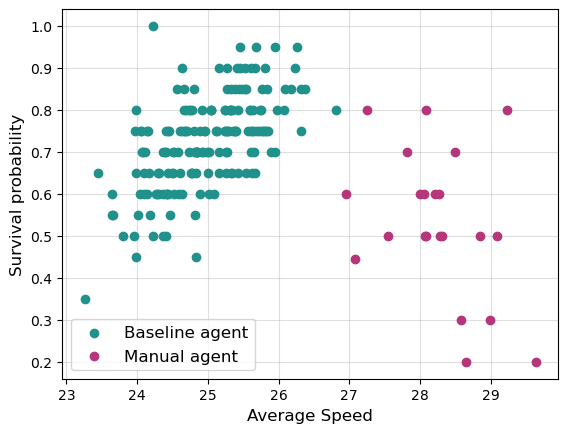

In [143]:
plt.scatter(Baseline.grDF['AvgSpeed'], Baseline.grDF['Crashed'], 
            label = 'Baseline agent', alpha=1,
            zorder = 100, color = '#21918c')

plt.scatter(Manual.grDF['AvgSpeed'], Manual.grDF['Crashed'], 
            label = 'Manual agent', alpha=1,
            zorder = 100, color = '#b5367a')

plt.grid(True, alpha = 0.4)

plt.xlabel("Average Speed", fontsize = 12)
plt.ylabel("Survival probability", fontsize = 12)

plt.legend(fontsize = 12, loc = 'lower left')

#plt.savefig("SpeedVsSurvRate.pdf")

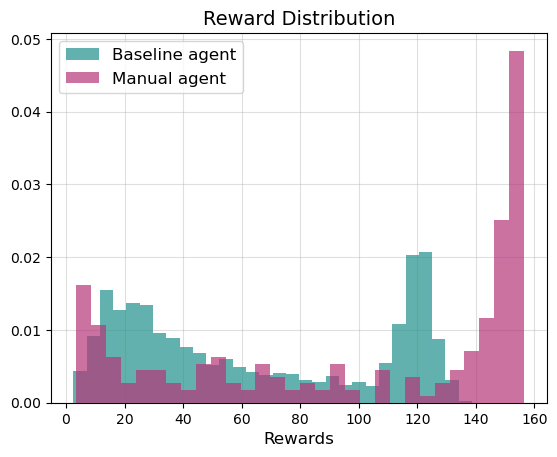

In [144]:
plt.hist(Baseline.rDF['Rewards'], density = True, 
         label = 'Baseline agent', bins = 30,
         alpha = 0.7,
         zorder = 100, color='#21918c')

plt.hist(Manual.rDF['Rewards'], density = True, 
         label = 'Manual agent', bins = 30,
         alpha = 0.7,
         zorder = 100, color='#b5367a')

plt.grid(True, alpha = 0.4)
plt.xlabel("Rewards", fontsize = 12)
plt.title("Reward Distribution", fontsize = 14)

plt.legend(fontsize = 12)

#plt.savefig("RewardDist.pdf")
plt.show()

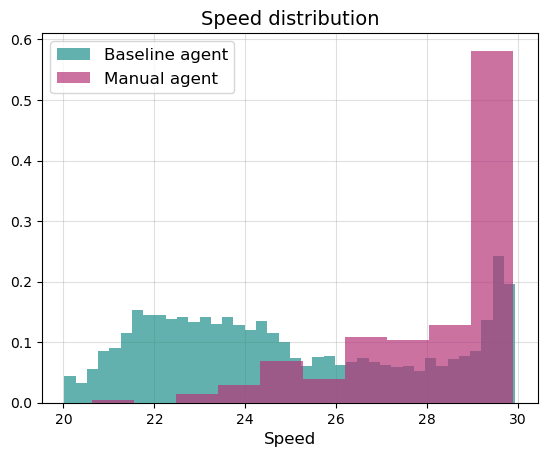

In [146]:
plt.hist(Baseline.rDF['AvgSpeed'], label = 'Baseline agent', density = True,
         zorder = 100, alpha = 0.7, bins = 40,
         color = '#21918c')
plt.hist(Manual.rDF['AvgSpeed'], label = 'Manual agent', density = True,
         zorder = 100, alpha = 0.7, color = '#b5367a')

plt.grid(True, alpha = 0.4)
plt.xlabel("Speed", fontsize = 12)
plt.title("Speed distribution", fontsize = 14)

plt.legend(fontsize = 12)
#plt.savefig("SpeedDist.pdf")
plt.show()